# Lead Scoring Assignment

#### Done By : Shiva Chandra Kante, Krishnakumar V, Kamatchi M

#### Problem Statement:
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

#### Business Goal:
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.




## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Lead Scoring dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
## setting the pandas column & row view to maximum
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
lead_score = pd.read_csv("Leads.csv")

In [5]:
# Check the head of the dataset
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
lead_score.shape

(9240, 37)

In [7]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### <b>*OBSERVATION*<b>:
- In many columns we are seeing select as values.

### Data Cleaning

In [8]:
# We are replacing Select with Nan
lead_score = lead_score.replace('Select',np.nan)

In [9]:
# Checking for duplicate rows in the dataframe.
duplicate_row_count = lead_score.duplicated().sum()
print(f" Duplicate Row Count in Lead scoring Dataframe :- {duplicate_row_count}")

 Duplicate Row Count in Lead scoring Dataframe :- 0


In [10]:
## understanding percentage of null values of each column
(lead_score.isnull().sum() * 100/lead_score.shape[0]).round(2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Lead Origi

In [11]:
columns_to_drop = []
for column in lead_score.columns:
    if (lead_score[column].isnull().sum() * 100/lead_score.shape[0]).round(2) > 40:
        columns_to_drop.append(column)
columns_to_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead_score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

##### <b>*OBSERVATION*<b>:
- Some columns contain only a single value across all rows, so it's better to drop those columns.

In [13]:
# Dropping columns with only one value for all the rows
columns_to_drop.extend(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                            'Get updates on DM Content','I agree to pay the amount through cheque'])

In [14]:
columns_to_drop

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [15]:
lead_score.drop(columns_to_drop, axis = 1, inplace = True)

In [16]:
## understanding percentage of null values of each column
(lead_score.isnull().sum() * 100/lead_score.shape[0]).round(2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Total Time Spent on Website                       0.00
Do Not Call                                       0.00
Converted                                         0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Prospect ID                                       0.00
Do Not Email                                      0.00
Newspaper Article                                 0.00
Search    

In [17]:
lead_score['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberi

In [18]:
def replace_country(x):
    category = ""
    if x == "India":
        category = "India"
    elif x is np.nan:
        category = "Not Provided"
    else:
        category = "Outside India"
    return category

lead_score['Country'] = lead_score.apply(lambda x:replace_country(x['Country']), axis = 1)
lead_score['Country'].value_counts()

Country
India            6492
Not Provided     2461
Outside India     287
Name: count, dtype: int64

In [19]:
lead_score['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

##### <b>*OBSERVATION*<b>:
- Apart from the null values, `What matters most to you in choosing a course'` is a highly skewed column. So we can drop the column.

In [20]:
lead_score.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [21]:
lead_score['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [22]:
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].fillna("Not Provided")
lead_score['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
Not Provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [23]:
lead_score['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

- Filling null values in `Specialization` Column with Not Provided value. Insttead of dropping it.

In [24]:
lead_score['Specialization'] = lead_score['Specialization'].fillna("Not Provided")
lead_score['Specialization'].value_counts(dropna=False)

Specialization
Not Provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [25]:
lead_score['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

##### <b>*OBSERVATION*<b>:
- The `City` column has 39.71% missing values. Imputing them with "Mumbai" would increase data skewness, potentially biasing the model. Therefore, it's best to drop the `City` column.


In [26]:
lead_score.drop('City', axis = 1, inplace = True)

In [27]:
lead_score['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

##### <b>*OBSERVATION*<b>:
- The `Tags` column has 36.29% missing values. Since tags indicate the current status of a lead, they are not useful for modeling. Therefore, this column can be dropped.



In [28]:
lead_score.drop('Tags', axis = 1, inplace = True)

In [29]:
## understanding percentage of null values of each column
(lead_score.isnull().sum() * 100/lead_score.shape[0]).round(2).sort_values(ascending=False)

Page Views Per Visit                      1.48
TotalVisits                               1.48
Last Activity                             1.11
Lead Source                               0.39
Lead Number                               0.00
Prospect ID                               0.00
Do Not Call                               0.00
Do Not Email                              0.00
Lead Origin                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable 

In [30]:
lead_score['TotalVisits'].value_counts(dropna=False).head(10)

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [31]:
# TotalVisits missing values to be imputed with mode
lead_score['TotalVisits'].fillna(lead_score['TotalVisits'].mode()[0], inplace=True)

In [32]:
lead_score['Page Views Per Visit'].value_counts(dropna=False).head(10)

Page Views Per Visit
0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
NaN     137
Name: count, dtype: int64

In [33]:
# Page Views Per Visit missing values to be imputed with mode
lead_score['Page Views Per Visit'].fillna(lead_score['Page Views Per Visit'].mode()[0], inplace=True)

In [34]:
lead_score['Last Activity'].value_counts(dropna=False).head(10)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
NaN                           103
Unreachable                    93
Name: count, dtype: int64

In [35]:
# Filling null values in Last Activity with Email Opened
lead_score['Last Activity'].fillna('Email Opened', inplace=True)

In [36]:
lead_score['Lead Source'].value_counts(dropna=False).head(10)

Lead Source
Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
NaN                   36
bing                   6
Name: count, dtype: int64

In [37]:
# Filling null values in Lead Source with Google
lead_score['Lead Source'].fillna('Google', inplace=True)

In [38]:
## understanding percentage of null values of each column
(lead_score.isnull().sum() * 100/lead_score.shape[0]).round(2).sort_values(ascending=False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

In [39]:
lead_score.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Country                                      3
Specialization                              19
What is your current occupation              7
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable 

##### <b>*OBSERVATION*<b>:
- The `Lead Number` and `Prospect ID` columns contain unique values for each row and are used solely for lead tracking. Since they do not contribute to the model, they can be dropped.

In [40]:
lead_score.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

##### Checking for Skeweness in the Categorical Columns

In [41]:
categorical_cols = lead_score.select_dtypes(include=['category', 'object']).columns.tolist()
categorical_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [42]:
# A plot function to analyze the categorical columns
def plot_categorical_skweness_test(df,col):
    category_counts = df[col].value_counts()
    total = len(df)
    # Calculate percentages
    category_percentages = (category_counts / total) * 100
    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=category_counts.index, y=category_counts.values, color='salmon')
    # Annotate with percentage values
    for i, (count, percentage) in enumerate(zip(category_counts.values, category_percentages.values)):
        if percentage <= 5:
            palce = total*0.05
        else :
            palce = count / 2
        plt.text(i, palce, f'{percentage:.1f}%',  ha='center',  va='center', fontsize=12,rotation=90)
    # Labels and title
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.title(f"Count and Percentage of Each {col}")
    plt.show()

                                   ------------------ Categorical Skweness test FOR Lead Origin ------------------                                    


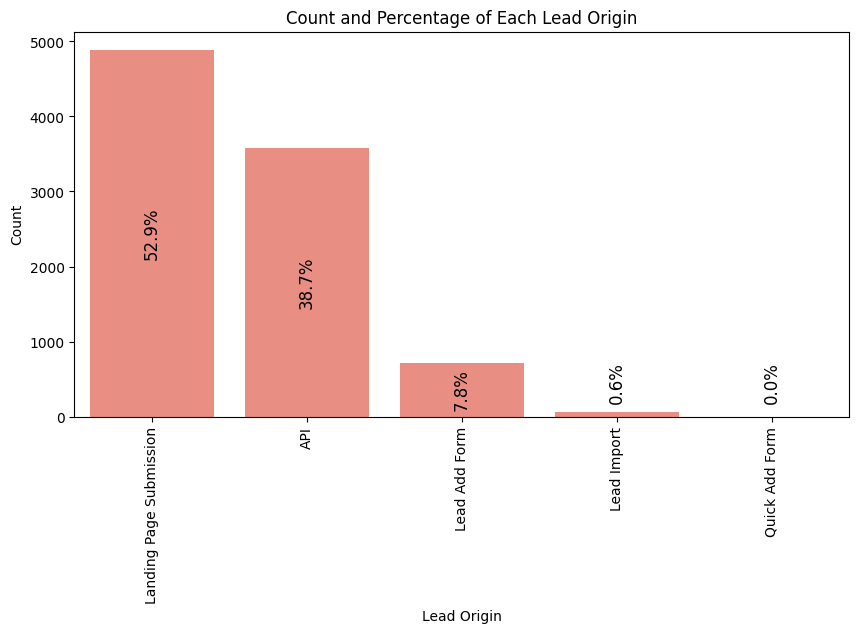

                                   ------------------ Categorical Skweness test FOR Lead Source ------------------                                    


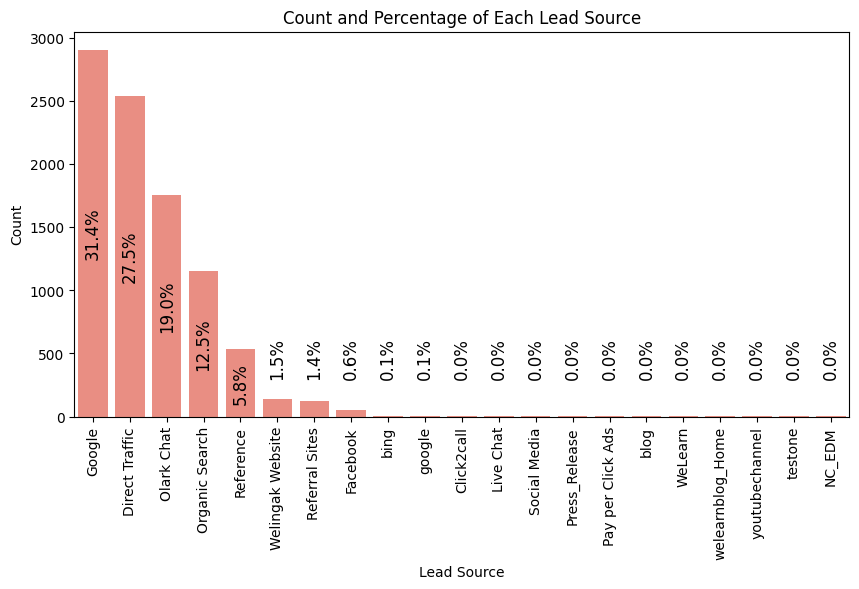

                                   ------------------ Categorical Skweness test FOR Do Not Email ------------------                                   


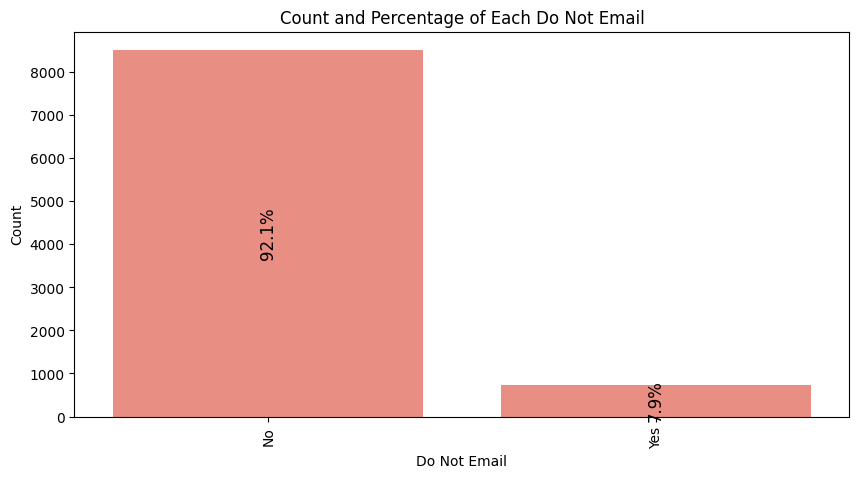

                                   ------------------ Categorical Skweness test FOR Do Not Call ------------------                                    


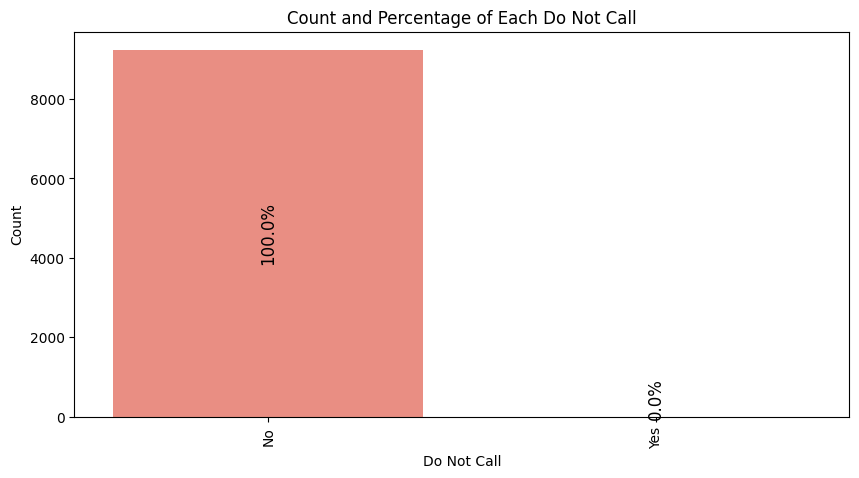

                                  ------------------ Categorical Skweness test FOR Last Activity ------------------                                   


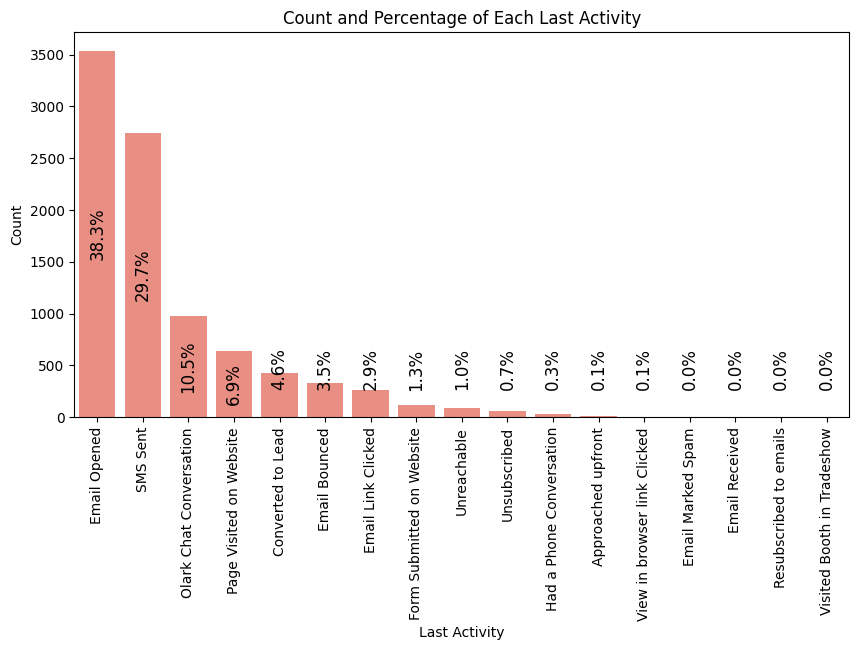

                                     ------------------ Categorical Skweness test FOR Country ------------------                                      


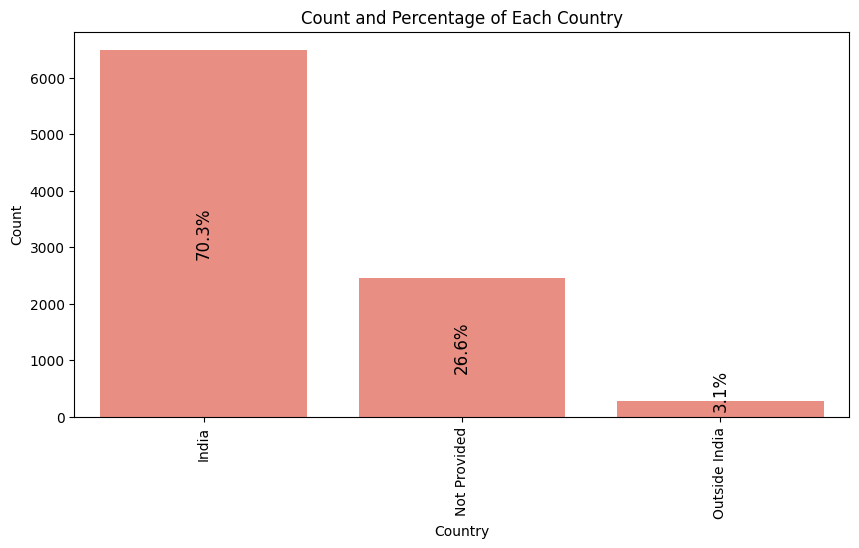

                                  ------------------ Categorical Skweness test FOR Specialization ------------------                                  


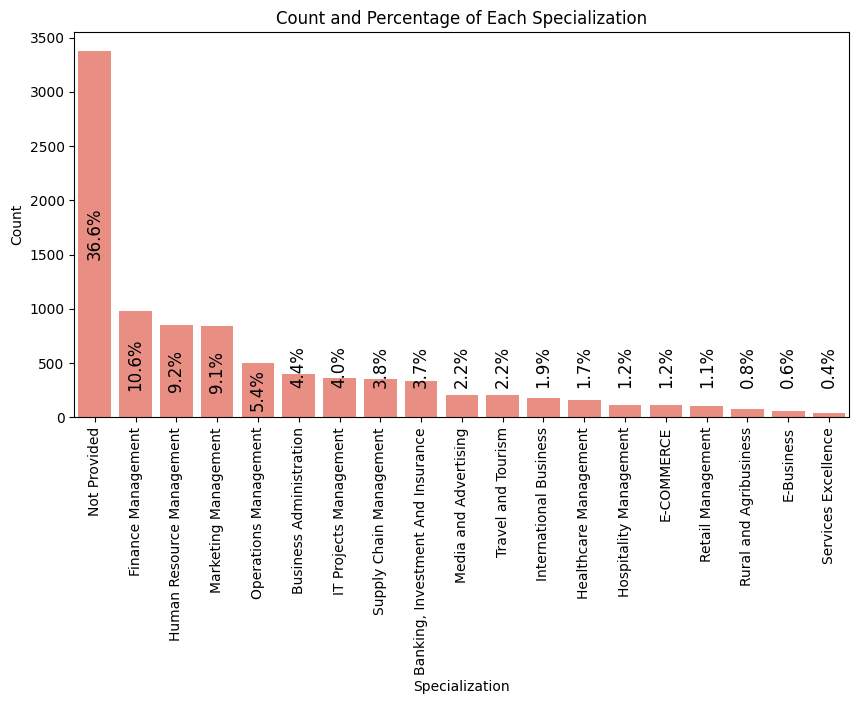

                         ------------------ Categorical Skweness test FOR What is your current occupation ------------------                          


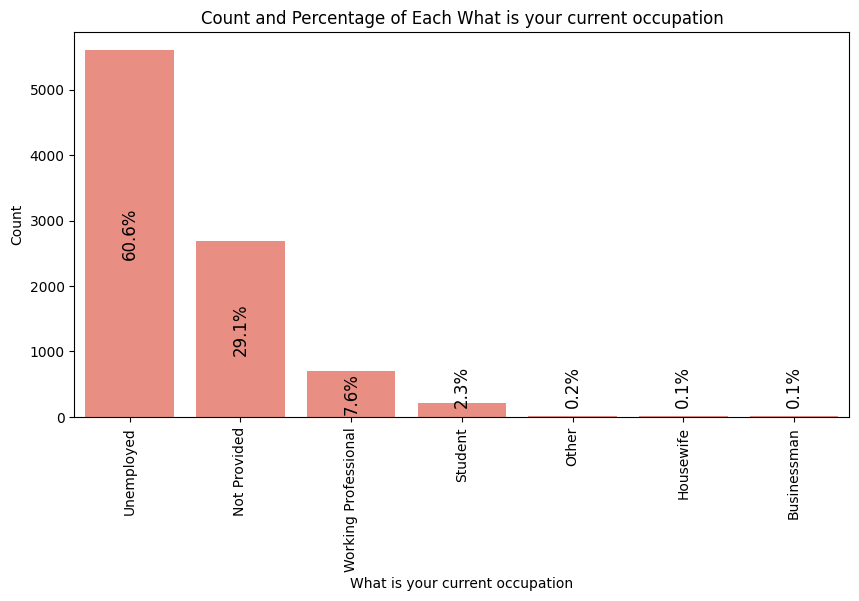

                                      ------------------ Categorical Skweness test FOR Search ------------------                                      


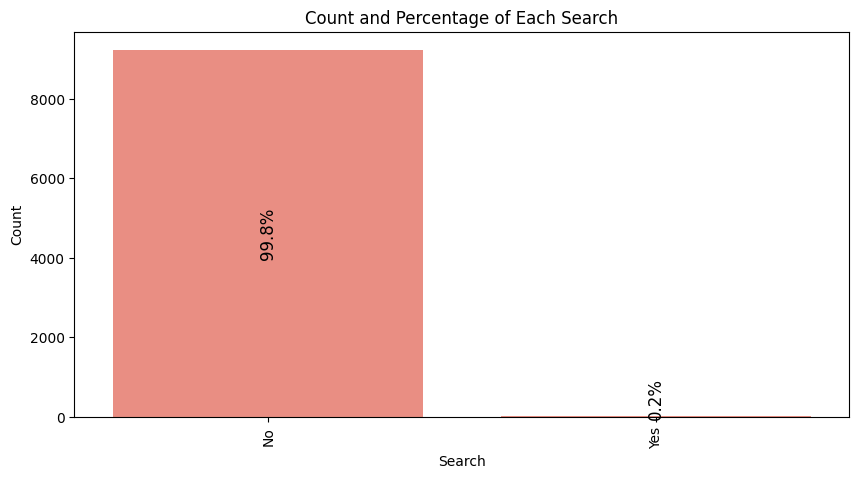

                                ------------------ Categorical Skweness test FOR Newspaper Article ------------------                                 


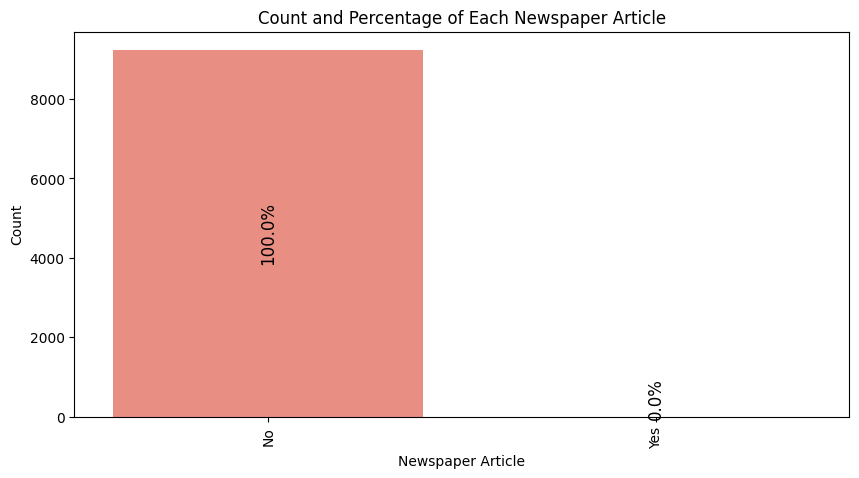

                                ------------------ Categorical Skweness test FOR X Education Forums ------------------                                


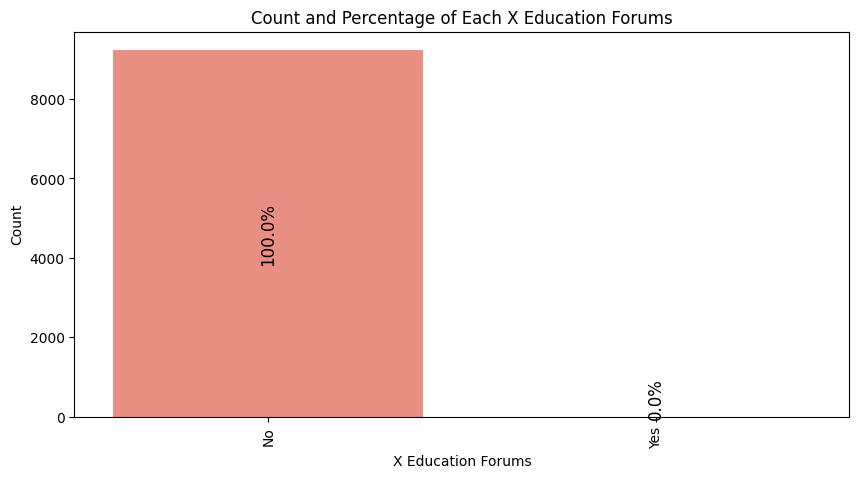

                                    ------------------ Categorical Skweness test FOR Newspaper ------------------                                     


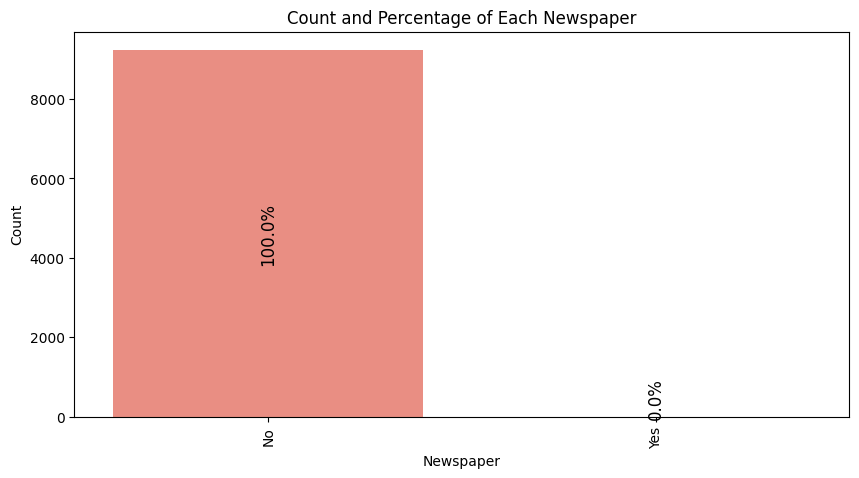

                              ------------------ Categorical Skweness test FOR Digital Advertisement ------------------                               


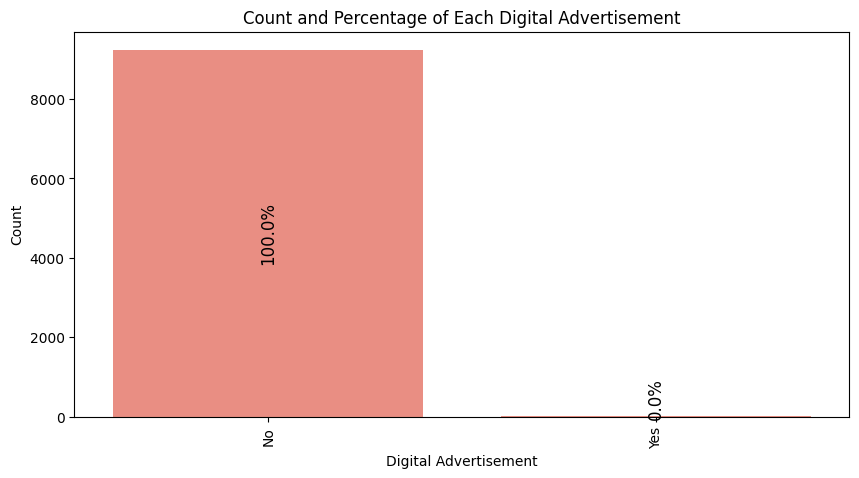

                             ------------------ Categorical Skweness test FOR Through Recommendations ------------------                              


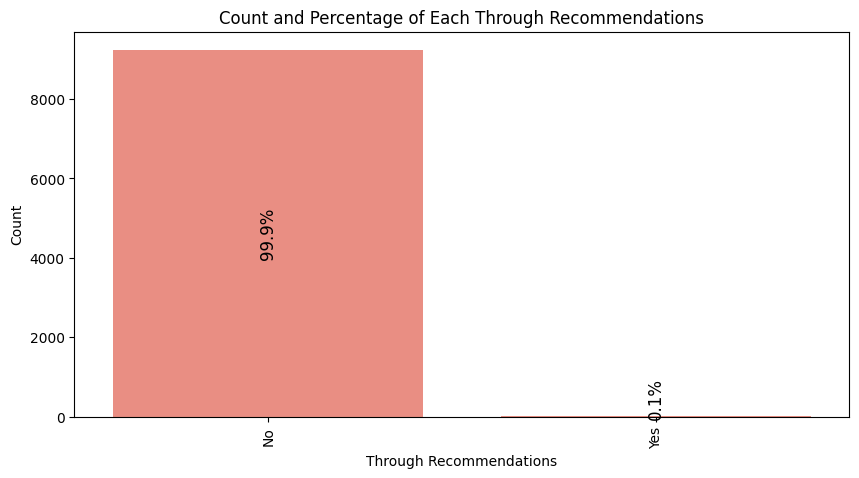

                      ------------------ Categorical Skweness test FOR A free copy of Mastering The Interview ------------------                      


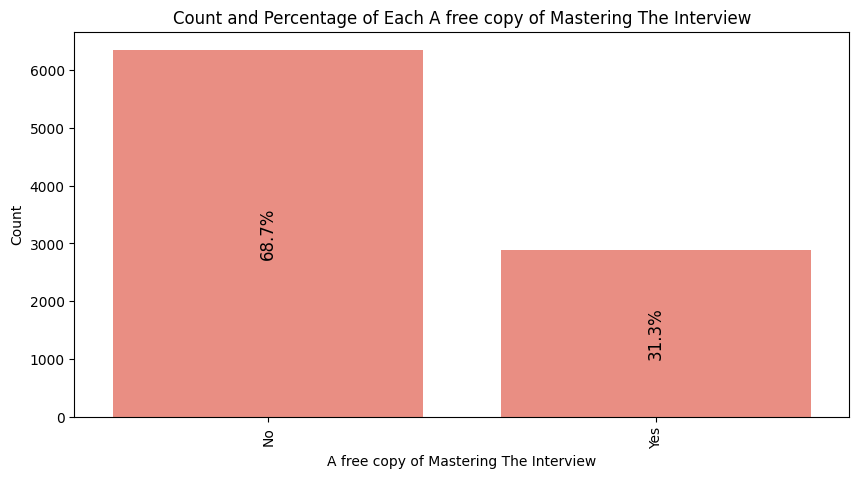

                              ------------------ Categorical Skweness test FOR Last Notable Activity ------------------                               


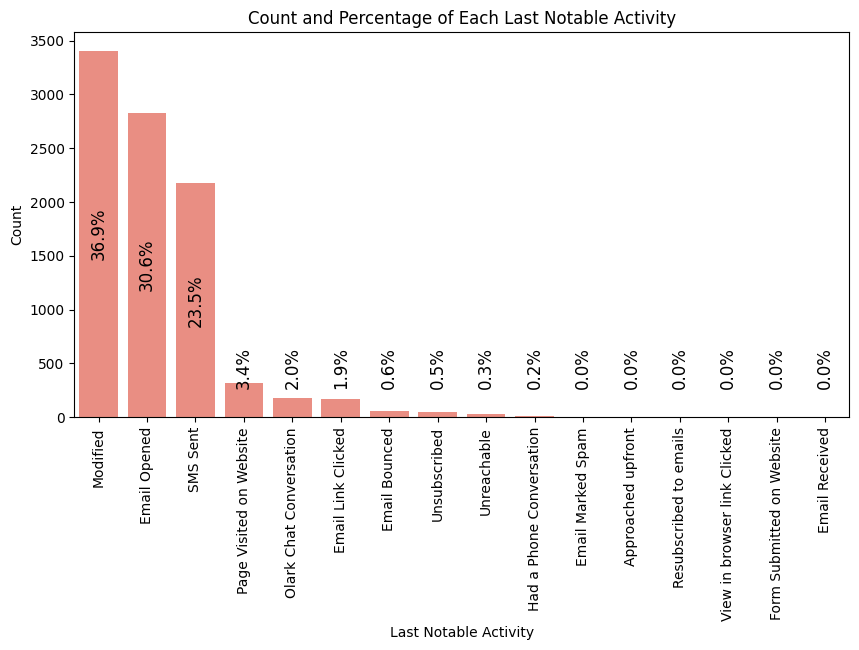

In [43]:
for col in categorical_cols:
    centered_text = f" ------------------ Categorical Skweness test FOR {col} ------------------ ".center(150)
    print(centered_text)
    plot_categorical_skweness_test(lead_score,col)

##### <b>*OBSERVATION*<b>:
- The following columns contain highly skewed data and will be dropped as they do not add value to the model. Moreover, skewed variables can negatively impact logistic regression performance by leading to biased or inaccurate parameter estimates.
  - `Do Not Call`
  -  `Search`
  -  `Newspaper Article`
  -  `X Education Forums`
  - `Newspaper`
  -  `Digital Advertisement`
  -  `Through Recommendations`


In [44]:
lead_score.drop(['Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations'], axis = 1, inplace = True)


In [45]:
lead_score['Lead Source'].value_counts(normalize=True)*100

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Social Media          0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64

##### <b>*OBSERVATION*<b>:
- In the column `Lead Source` we observe Google is present two times and Few other lead sources are very less in number so it is better to put in Others bucket.

In [46]:
# Changing google to Google
lead_score['Lead Source'] = lead_score['Lead Source'].replace("google","Google")

In [47]:
# Grouping low frequency value levels to Others
lead_score['Lead Source'] = lead_score['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")



In [48]:
lead_score['Lead Source'].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [49]:
lead_score['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: proportion, dtype: float64

##### <b>*OBSERVATION*<b>:
- The `Lead Activity` column contains many dummy variables with low percentages. To reduce the number of dummy variables while encoding, we can group low-frequency categories under "Others". This will help keep the dataset clean and prevent unnecessary columns.



In [50]:
# Grouping low frequency value levels to Others
lead_score['Last Activity'] = lead_score['Last Activity'].replace(["Unreachable","Unsubscribed","Had a Phone Conversation",
                                                           "Approached upfront","View in browser link Clicked",
                                                           "Email Received","Email Marked Spam",
                                                           "Visited Booth in Tradeshow","Resubscribed to emails"],"Others")


In [51]:
lead_score['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [52]:
lead_score.head(10)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Not Provided,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Not Provided,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Not Provided,Unemployed,No,Modified
5,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Not Provided,Not Provided,Not Provided,No,Modified
6,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Unemployed,No,Modified
7,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Not Provided,Not Provided,Not Provided,No,Modified
8,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,Not Provided,Yes,Email Opened
9,API,Google,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Not Provided,No,Email Opened


In [53]:
# Renaming column name "A free copy of Mastering The Interview" to "Free_copy" 
lead_score.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

In [54]:
# Renaming column name "What is your current occupationA free copy of Mastering The Interview" to "Current_occupation" 
lead_score.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [55]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current_occupation,Free_copy,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Provided,Not Provided,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Not Provided,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Not Provided,Unemployed,No,Modified


In [56]:
lead_score['Do Not Email'].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

##### <b>*OBSERVATION*<b>:
- The `Do Not Email` is a Binary Column which has two values, so lets replace them with 0 and 1.

In [57]:
lead_score['Do Not Email'] = lead_score['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

In [58]:
lead_score['Do Not Email'].value_counts()

Do Not Email
0    8506
1     734
Name: count, dtype: int64

In [59]:
lead_score['Free_copy'].value_counts()

Free_copy
No     6352
Yes    2888
Name: count, dtype: int64

##### <b>*OBSERVATION*<b>:
- The `Free_copy` is a Binary Column which has two values, so lets replace them with 0 and 1.

In [60]:
lead_score['Free_copy'] = lead_score['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [61]:
lead_score['Free_copy'].value_counts()

Free_copy
0    6352
1    2888
Name: count, dtype: int64

In [62]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current_occupation,Free_copy,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Provided,Not Provided,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Not Provided,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Not Provided,Unemployed,0,Modified


## Step 2: EDA

#### Data Imbalance

In [63]:
lead_score.Converted.value_counts(normalize=True)*100

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64

In [64]:
# Calculating Data Imbalance Ratio
round(len(lead_score[lead_score.Converted==0]) / len(lead_score[lead_score.Converted==1]),2)

1.59

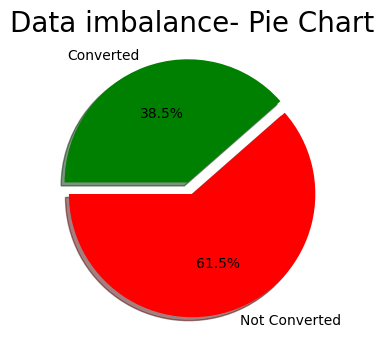

In [65]:
# Checking what % of Leads are Converted 
plt.figure(figsize=(8,4))
labels = ["Not Converted" ,"Converted"]
explode = (0, 0.1)
plt.title('Data imbalance- Pie Chart',fontdict={'fontsize':20})
plt.pie(lead_score.Converted.value_counts(), explode=explode, colors='rg', labels=labels, autopct='%1.1f%%',shadow=True, startangle=180)
plt.show()

##### <b>*OBSERVATION*<b>:
- The conversion rate is 38.5%, meaning only 38.5% of people converted to leads (minority), while 61.5% did not convert (majority). This indicates a class imbalance in the data.

### Univariate Analysis

##### Categorical columns

In [66]:
# A plot function to analyze the categorical columns
def plot_function_categorical(df,col):
    fig = plt.figure(figsize=(15,10))
    ax1 = plt.subplot(221)
    df[col].value_counts().plot.pie(autopct = "%1.0f%%" , ax = ax1,colors=['lightblue', 'salmon','green','red','yellow'])
    plt.title("Pie chart for " + col)
    ax2 = plt.subplot(222)
    plot_df=pd.DataFrame()
    non_default_df = df[df['Converted']==0]
    default_df =  df[df['Converted']==1]
    plot_df['0'] = ((non_default_df[col].value_counts())/len(non_default_df))
    plot_df['1'] = ((default_df[col].value_counts())/len(default_df))
    plot_df.plot.bar(ax=ax2,color=['lightblue','salmon'])
    plt.title("Plotting data in terms of percentage")
    ax3 = plt.subplot(223)
    sns.countplot(x=col,hue='Converted',data=df,ax=ax3,palette={0: 'lightblue', 1: 'salmon'})
    plt.xticks(rotation=90)
    plt.title("Countplot for " + col)
    ax4 = plt.subplot(224)
    stack_df = df[[col,'Converted',]].value_counts().unstack()
    stack_df['SUM'] = stack_df.sum(axis=1)
    stack_df['0'] = ((stack_df[0] / stack_df['SUM']) * 100).fillna(0)
    stack_df['1'] = ((stack_df[1] / stack_df['SUM']) * 100).fillna(0)
    ax4.bar(stack_df.index, stack_df['0'], label='0', color='lightblue')
    ax4.bar(stack_df.index, stack_df['1'], bottom=stack_df['0'], label='1', color='salmon')
    for index, row in stack_df.iterrows():
        ax4.text(index, row['0'] / 2, f"{row['0']:.1f}%", ha='center',  va='center', rotation=90)
        ax4.text(index, row['0'] + row['1'] / 2, f"{row['1']:.1f}%", ha='center',  va='center', rotation=90)
    ax4.set_ylabel('Percentage (%)')
    ax4.set_title('Stacked Bar Chart ')
    ax4.legend(title='Target')
    plt.xticks(rotation=90)
    plt.title("Stacked Bar Chart for " + col)
    fig.tight_layout()
    plt.show()

In [67]:
cat_cols = ['Lead Origin','Lead Source','Last Activity','Country','Specialization','Current_occupation',
            'Last Notable Activity','Do Not Email','Free_copy']

                                              ------------------ PLOT FOR Lead Origin ------------------                                              


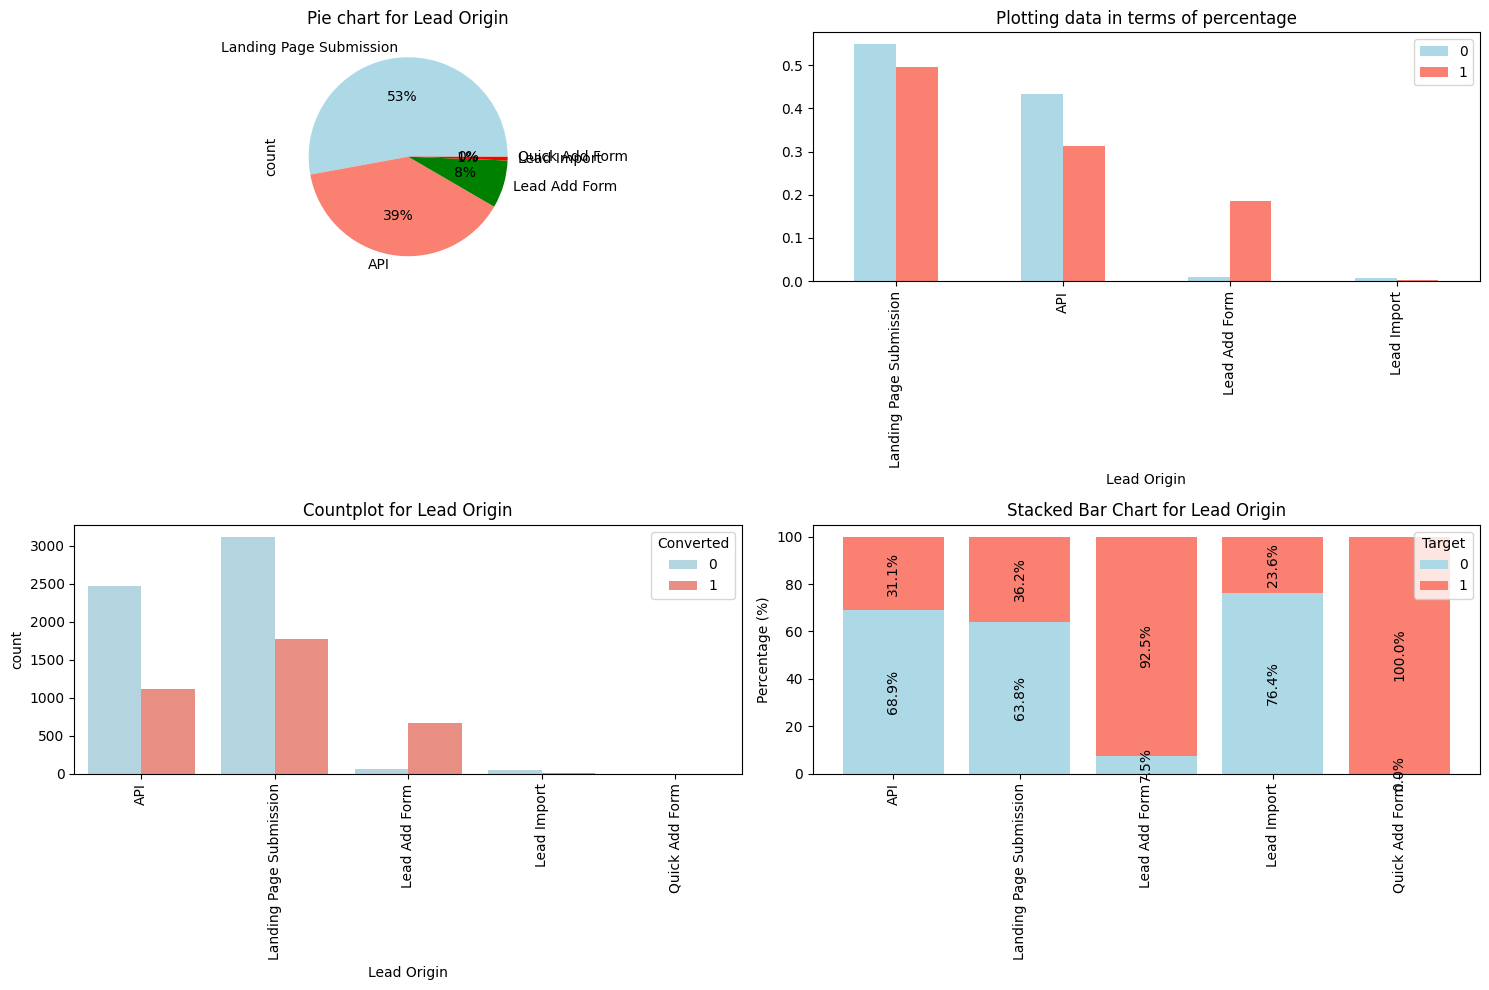

                                              ------------------ PLOT FOR Lead Source ------------------                                              


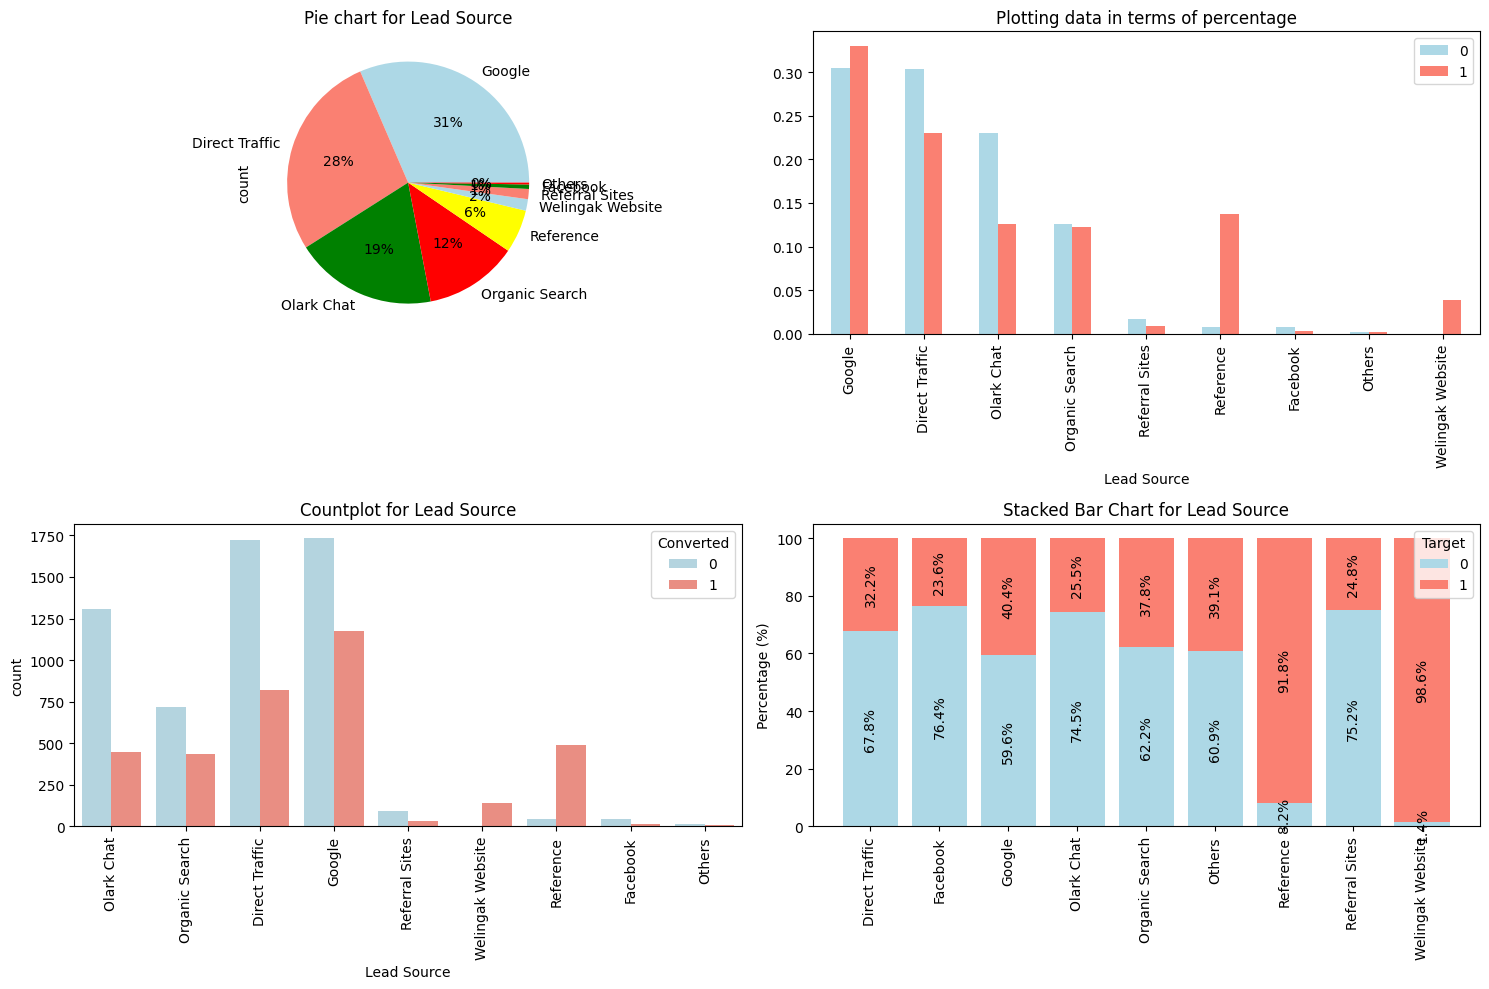

                                             ------------------ PLOT FOR Last Activity ------------------                                             


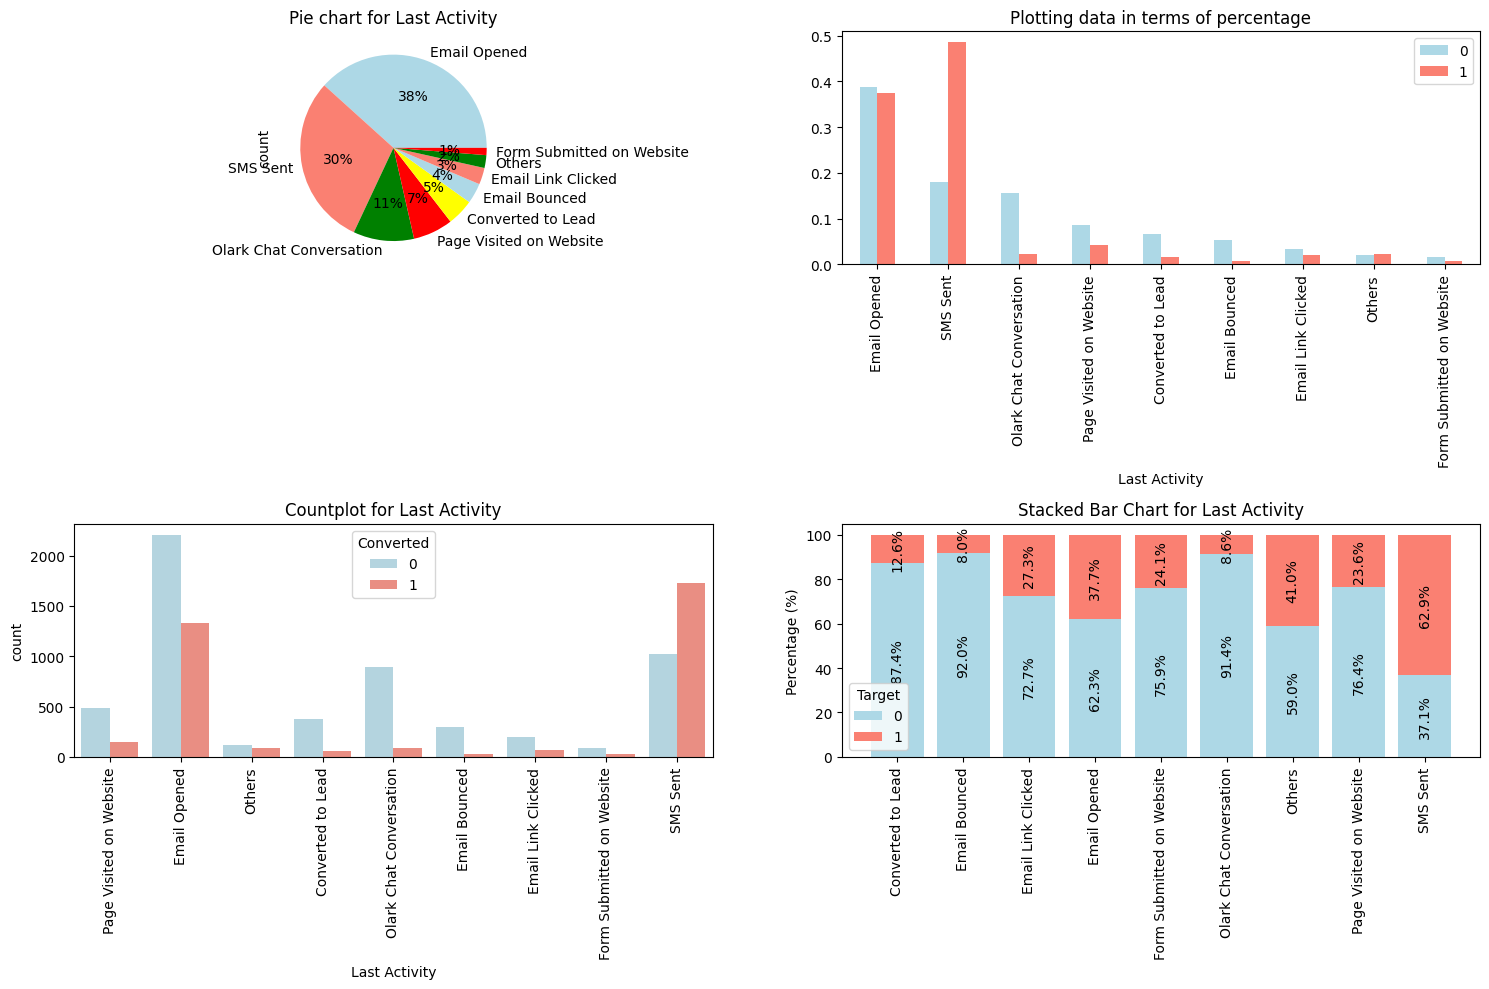

                                                ------------------ PLOT FOR Country ------------------                                                


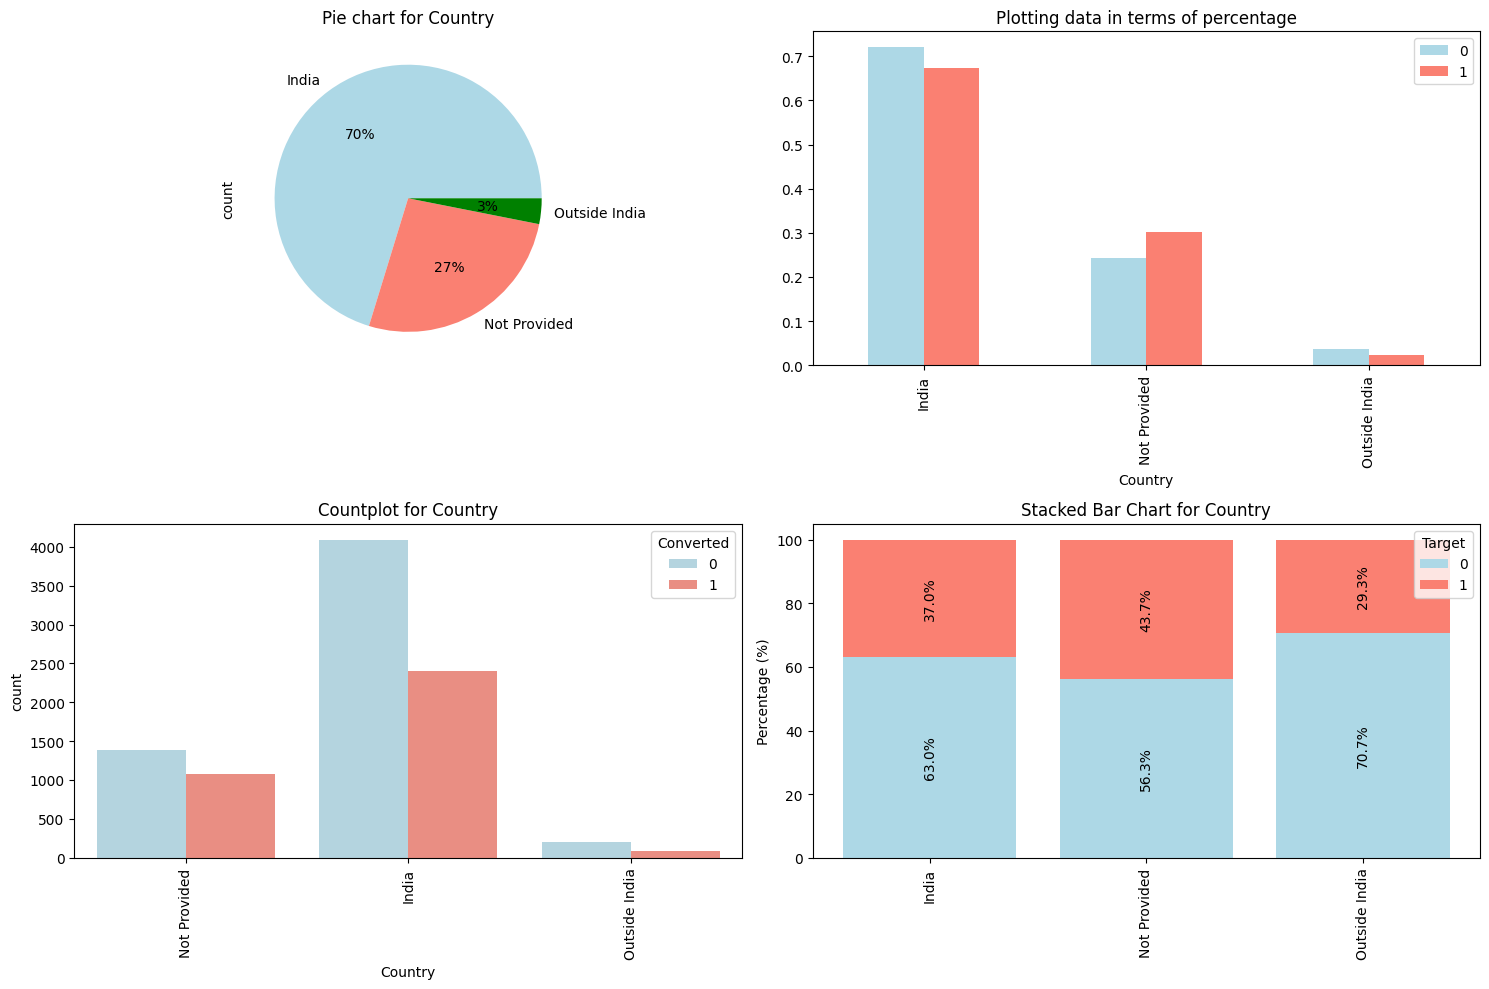

                                            ------------------ PLOT FOR Specialization ------------------                                             


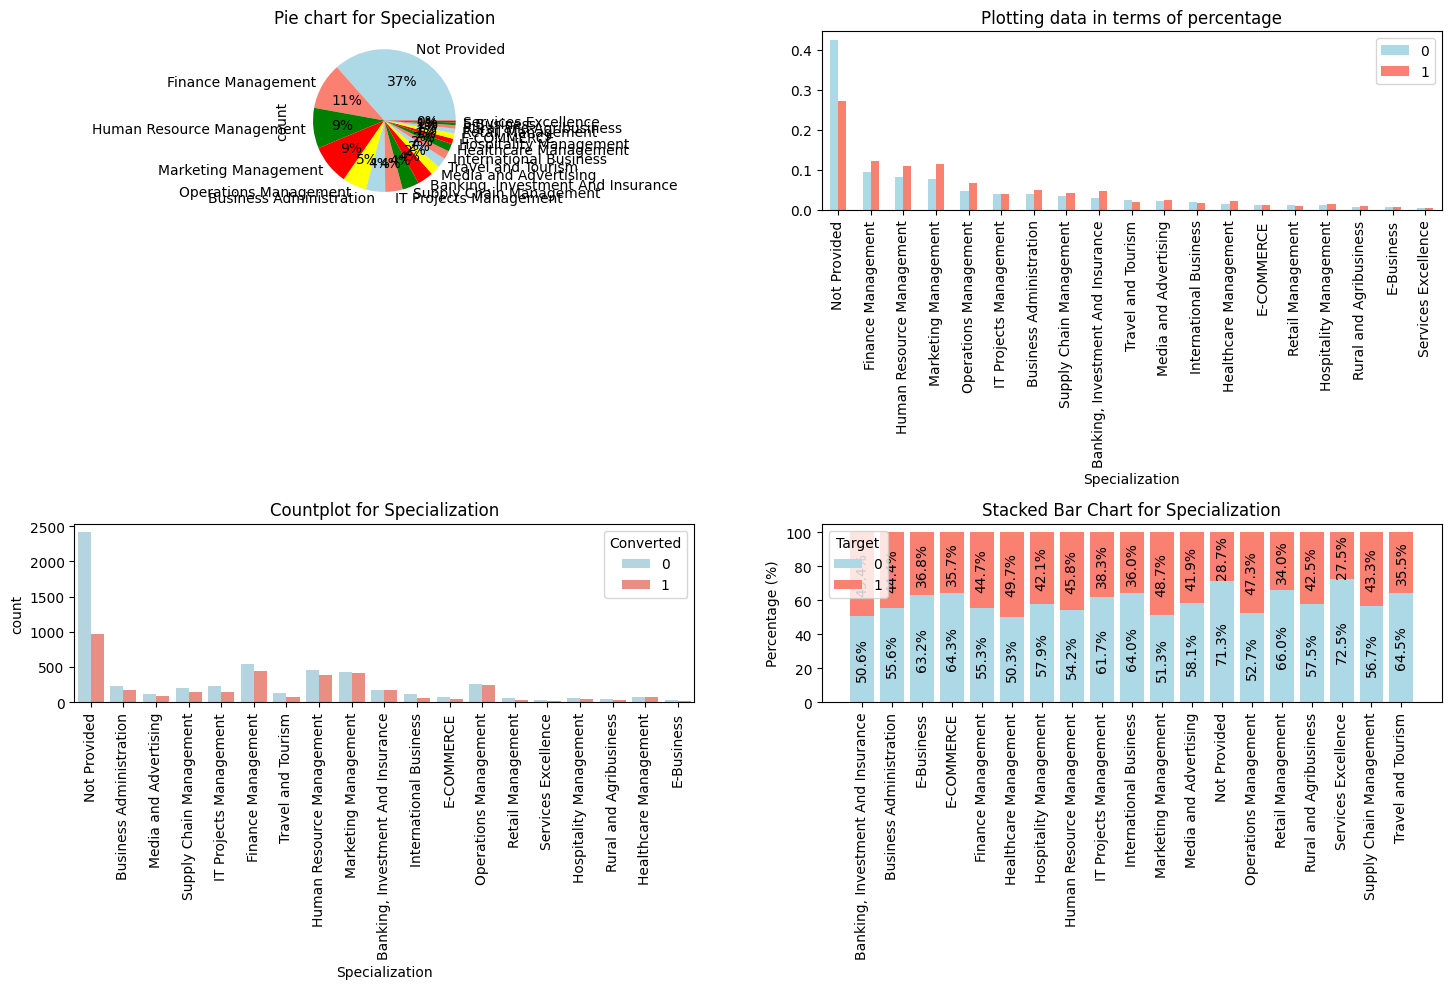

                                          ------------------ PLOT FOR Current_occupation ------------------                                           


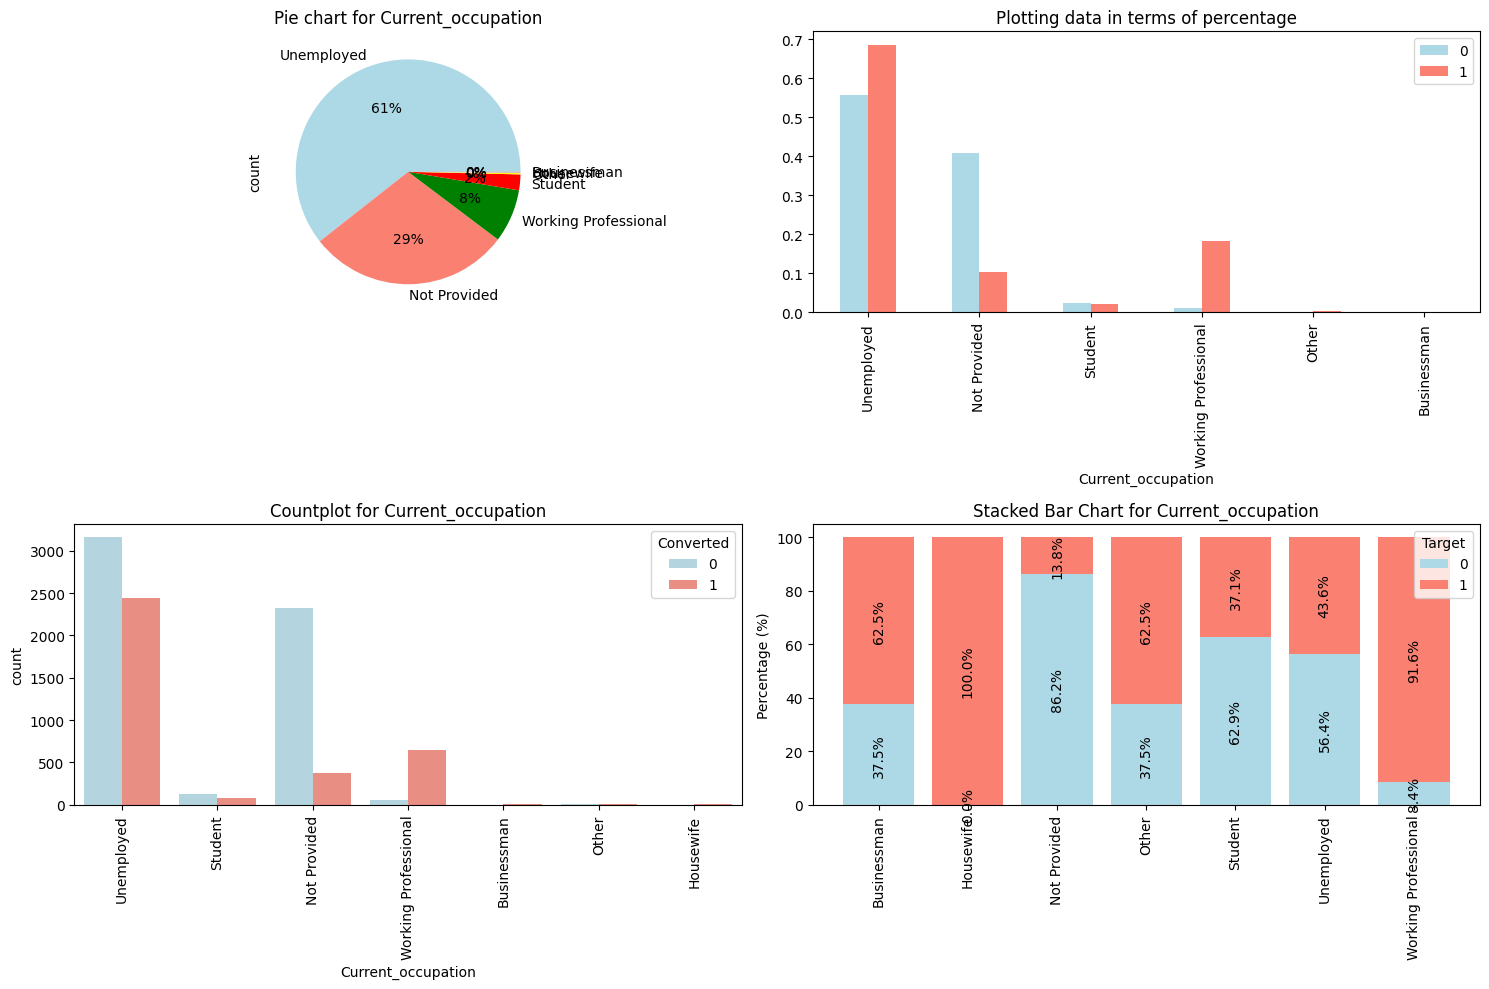

                                         ------------------ PLOT FOR Last Notable Activity ------------------                                         


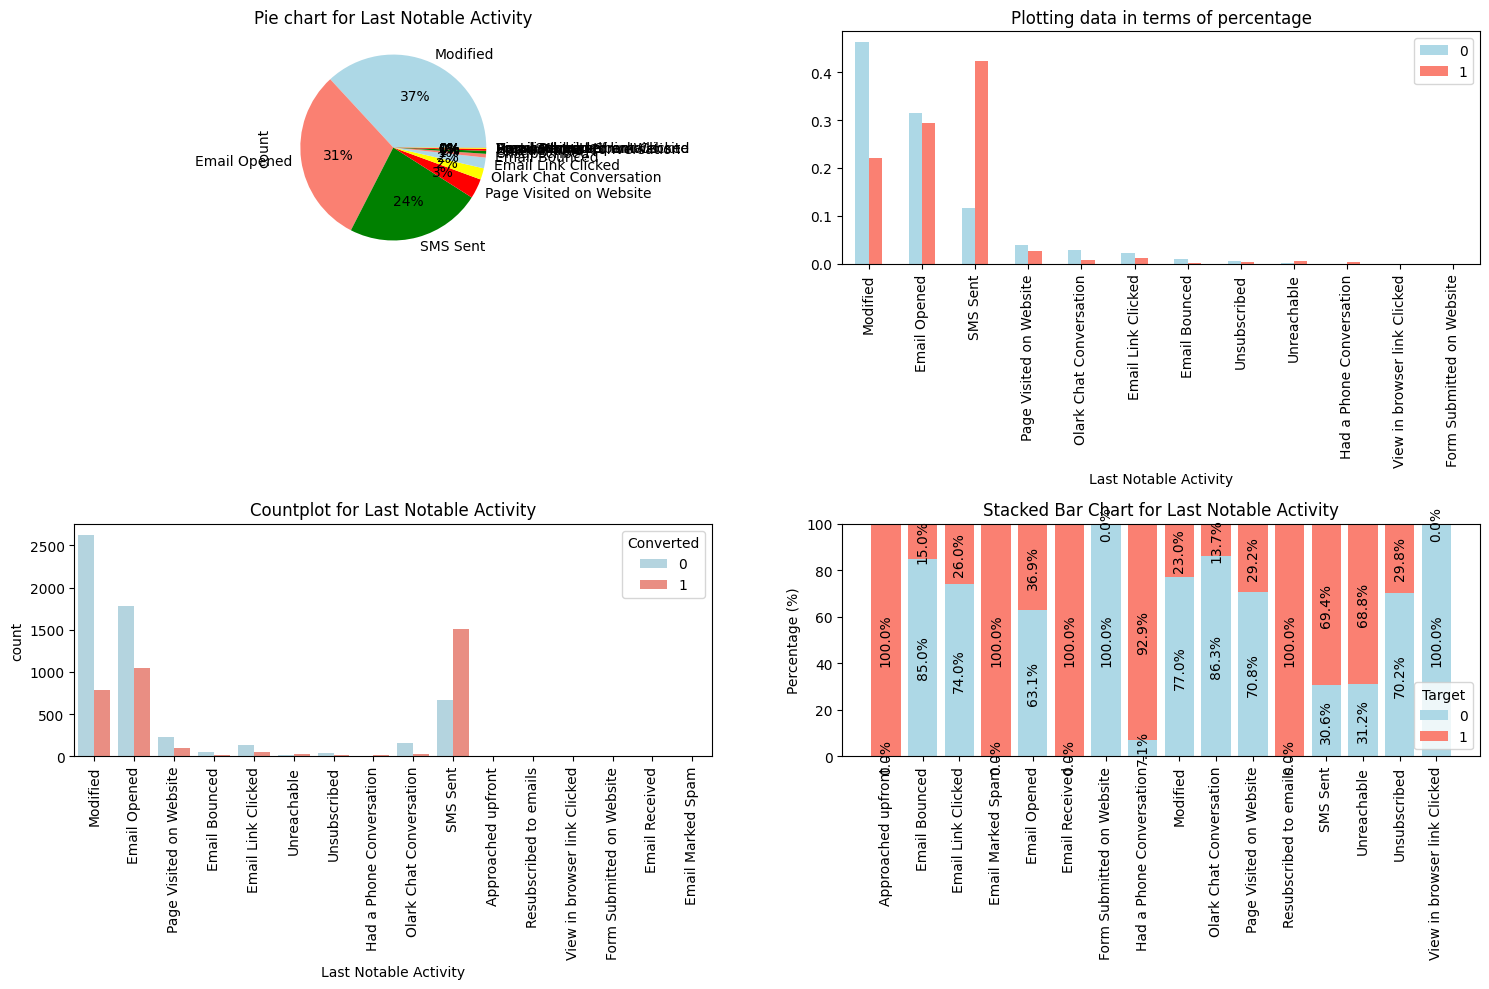

                                             ------------------ PLOT FOR Do Not Email ------------------                                              


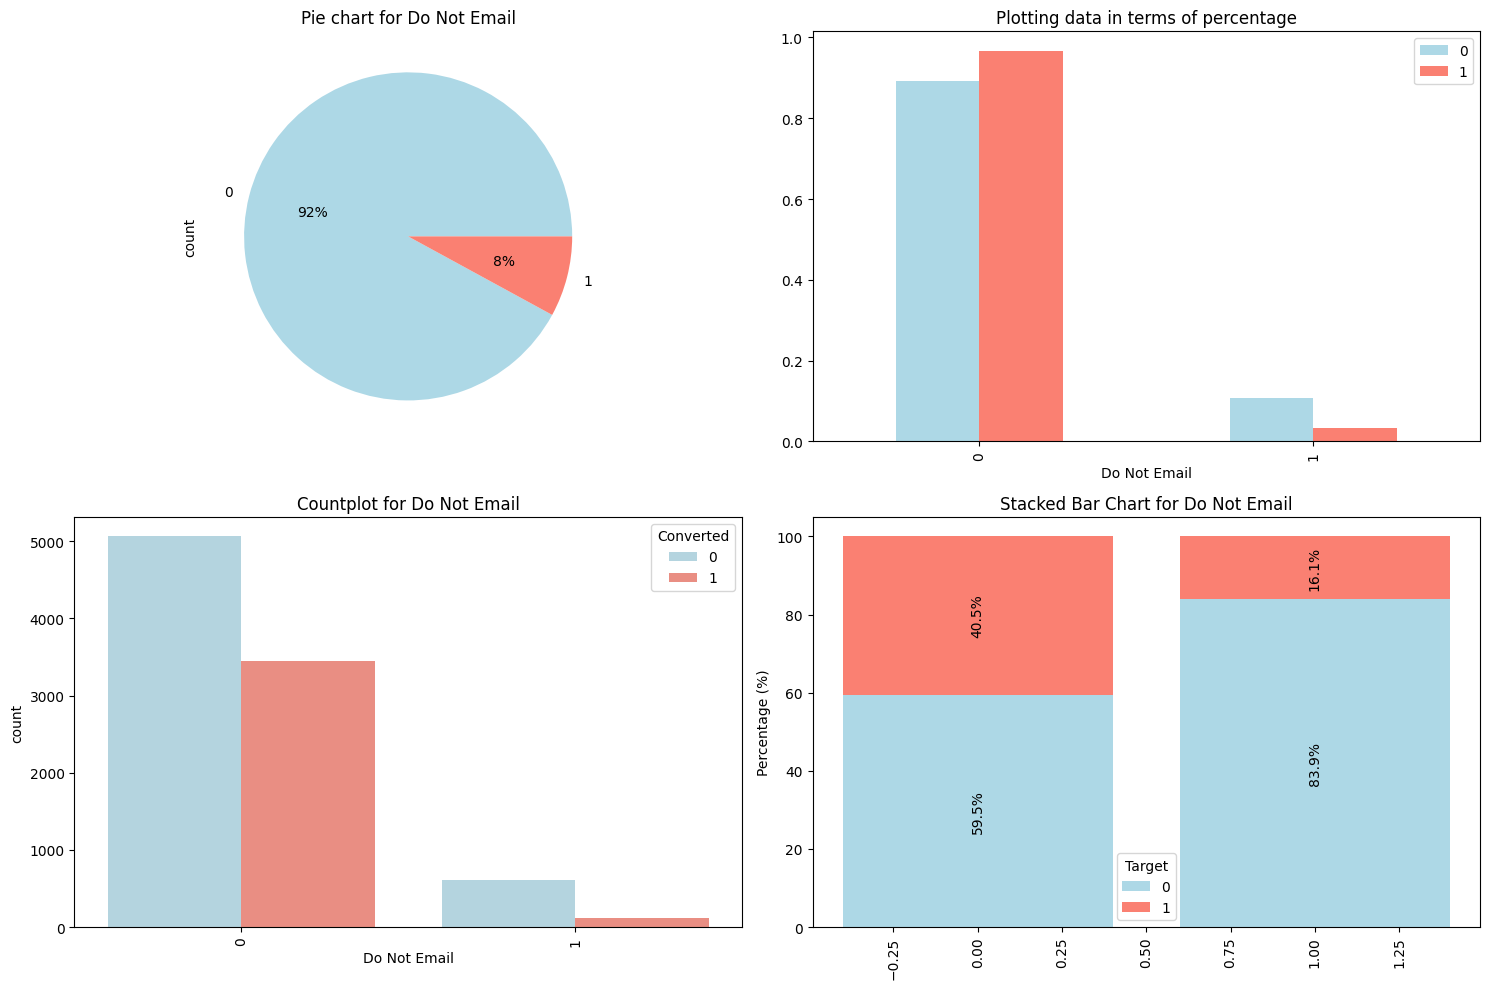

                                               ------------------ PLOT FOR Free_copy ------------------                                               


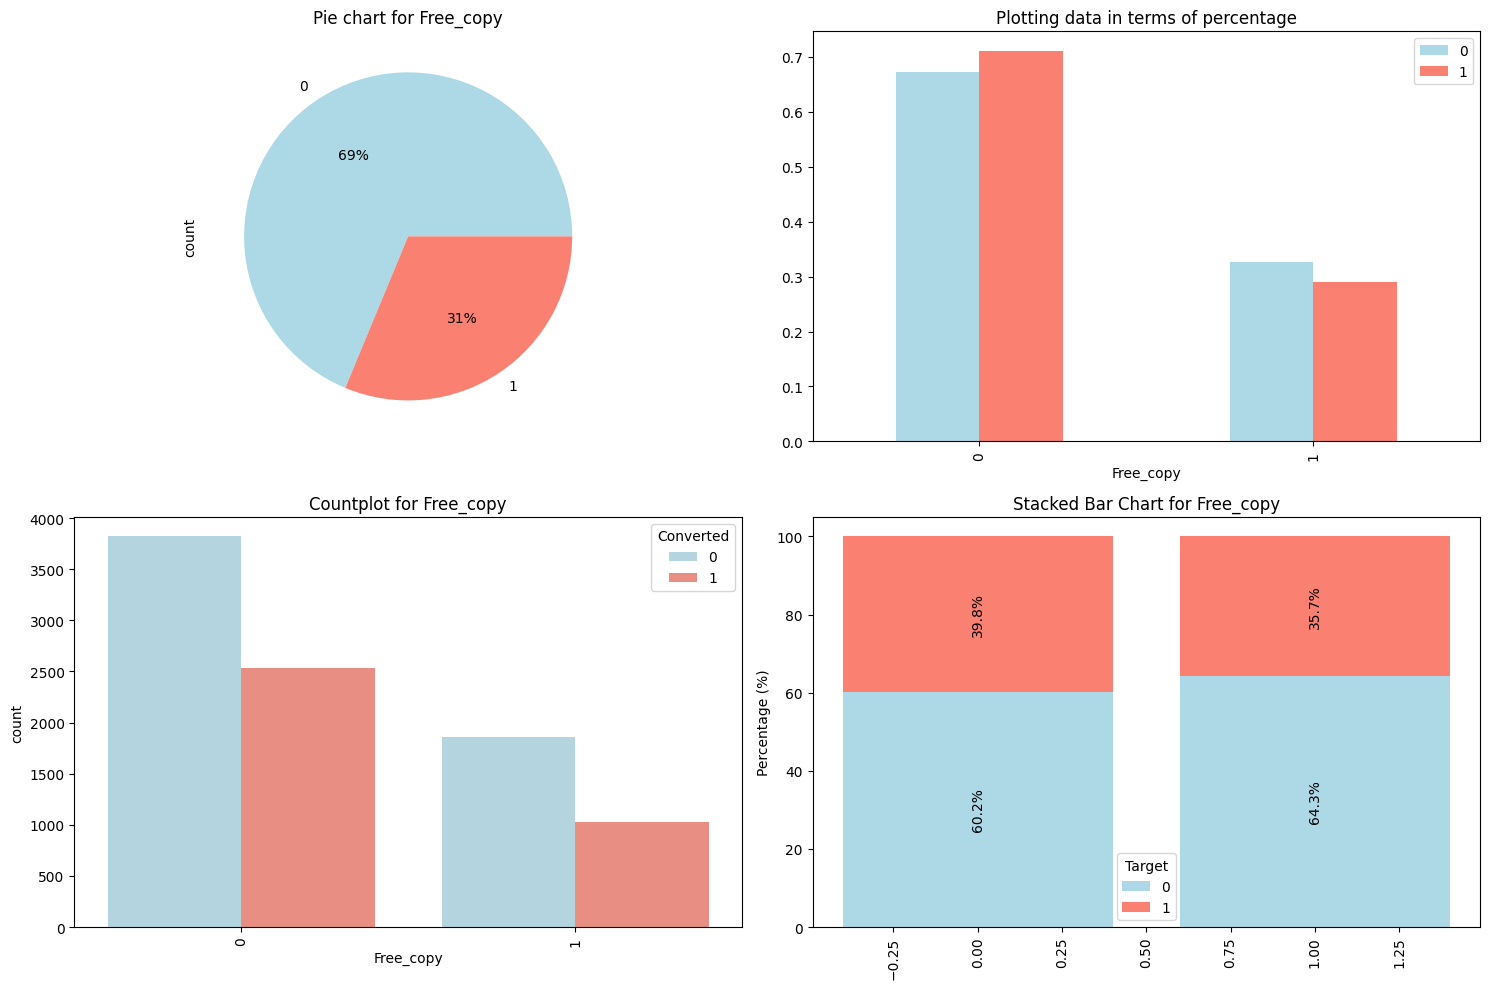

In [68]:
for col in cat_cols:
    centered_text = f" ------------------ PLOT FOR {col} ------------------ ".center(150)
    print(centered_text)
    plot_function_categorical(lead_score,col)

##### <b>*Observations & Insights from Categorical Analysis*<b>:

- Lead Origin: "Landing Page Submission" identified 53% of customers, while "API" identified 39%.
- Lead Source: 58% of leads come from Google & Direct Traffic combined.
- Last Activity: 68% of customer interactions are from SMS Sent & Email Opened activities.
- Current Occupation: 90% of customers are Unemployed.
- Do Not Email: 92% of people opted not to receive emails about the course.

##### Numerical columns

In [69]:
# A plot function to analyze the numerical columns
def plot_function_numerical(df,col):
    fig = plt.figure(figsize=(15,8))
    ax1 = plt.subplot(221)
    sns.boxplot(data=df, x='Converted', y=col,ax = ax1,color='salmon')
    # sns.boxplot(x=col,data=df,hue=df['Converted'],ax=ax1)
    plt.title("Box Plot for " + col)
    ax2 = plt.subplot(222)
    sns.histplot(df[col],bins=30,ax=ax2)
    plt.title("Hist Plot for " + col)
    ax3 = plt.subplot(223)
    sns.histplot(data=df[df['Converted']==0],kde=True,x=col,ax=ax3)
    plt.title(col + " for Converted Leads")
    ax4 = plt.subplot(224)
    sns.histplot(data=df[df['Converted']==1],kde=True,x=col,ax=ax4)
    plt.title(col + " for Not Converted Leads")
    fig.tight_layout()
    plt.show()

In [70]:
numeric_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

                                              ------------------ PLOT FOR TotalVisits ------------------                                              


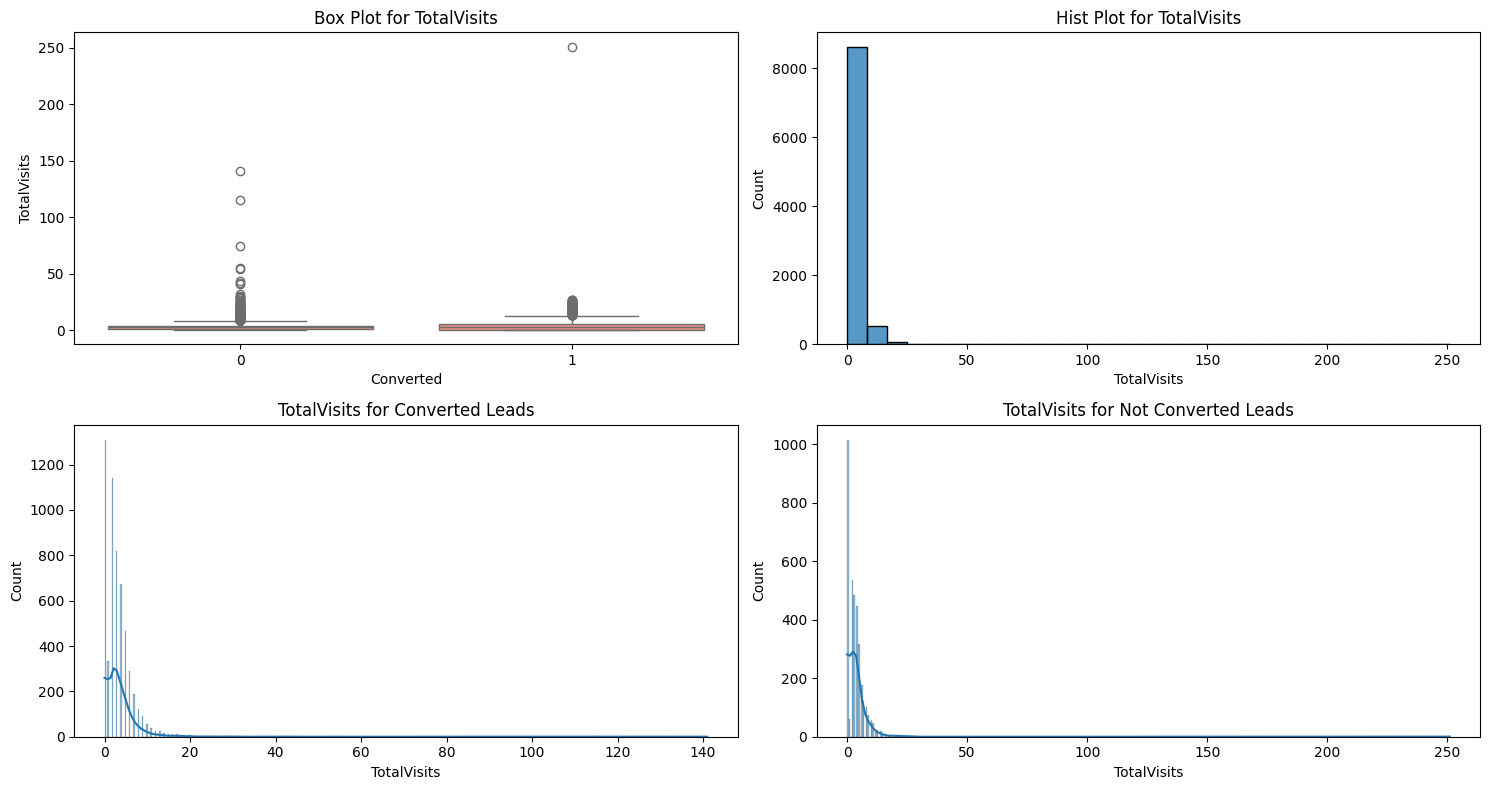

                                      ------------------ PLOT FOR Total Time Spent on Website ------------------                                      


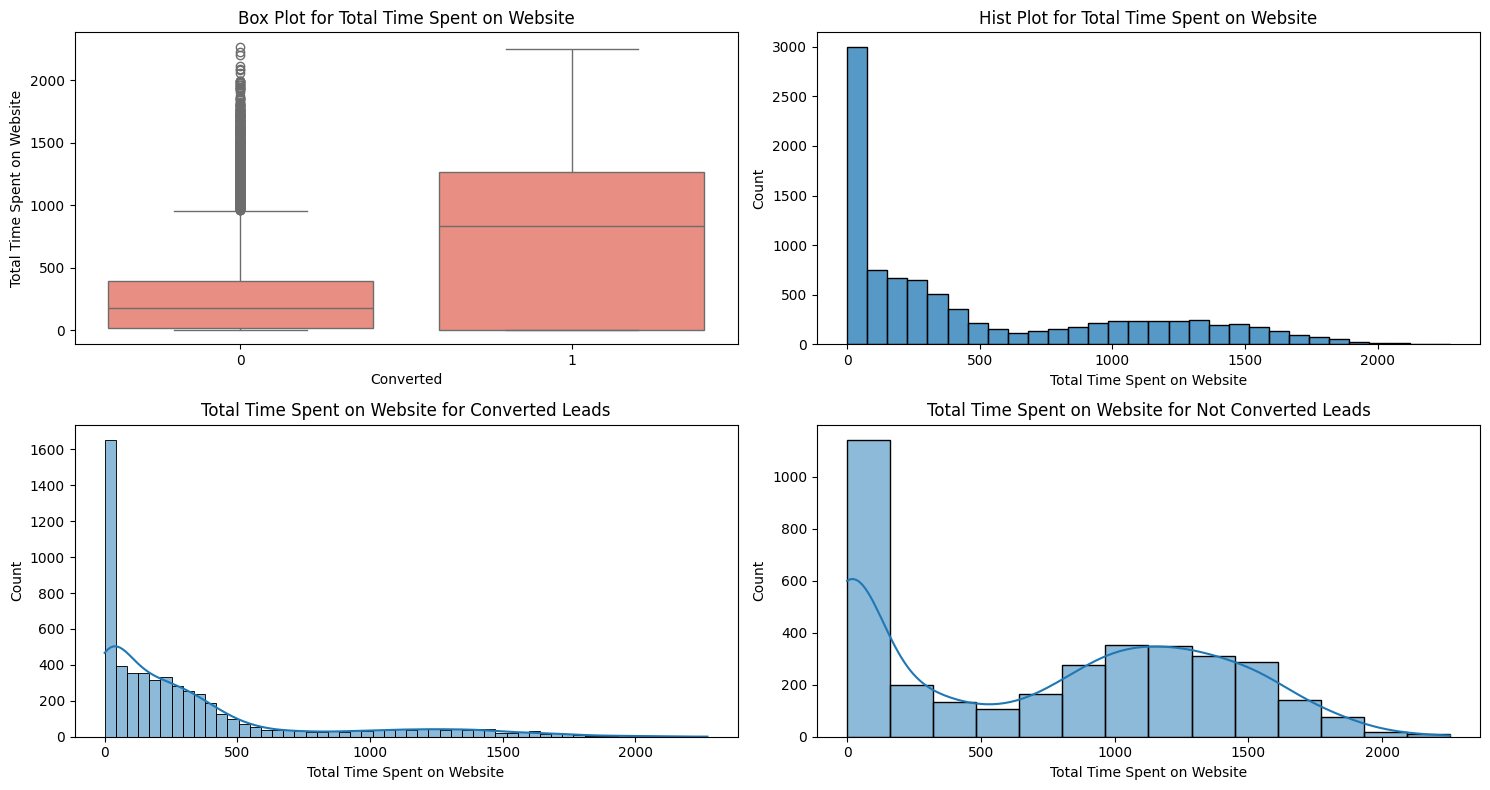

                                         ------------------ PLOT FOR Page Views Per Visit ------------------                                          


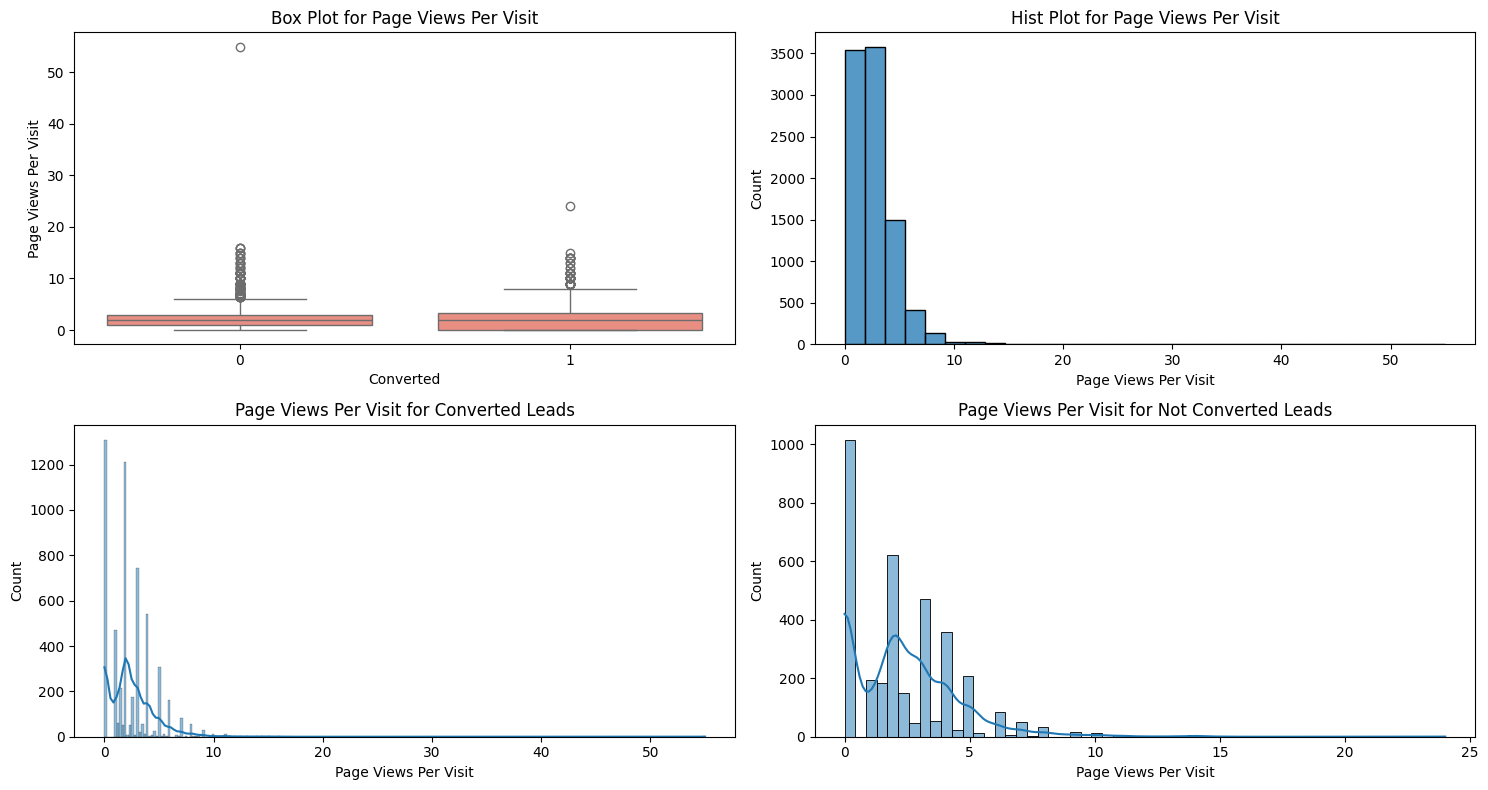

In [71]:
for col in numeric_cols:
    centered_text = f" ------------------ PLOT FOR {col} ------------------ ".center(150)
    print(centered_text)
    plot_function_numerical(lead_score,col)

##### <b>*Observations & Insights from Numerical Analysis*<b>:

- Leads who spend more time on the website are more likely to convert into successful leads. This indicates that higher engagement correlates with a higher conversion rate.

### Bivariate Analysis

##### Numerical columns

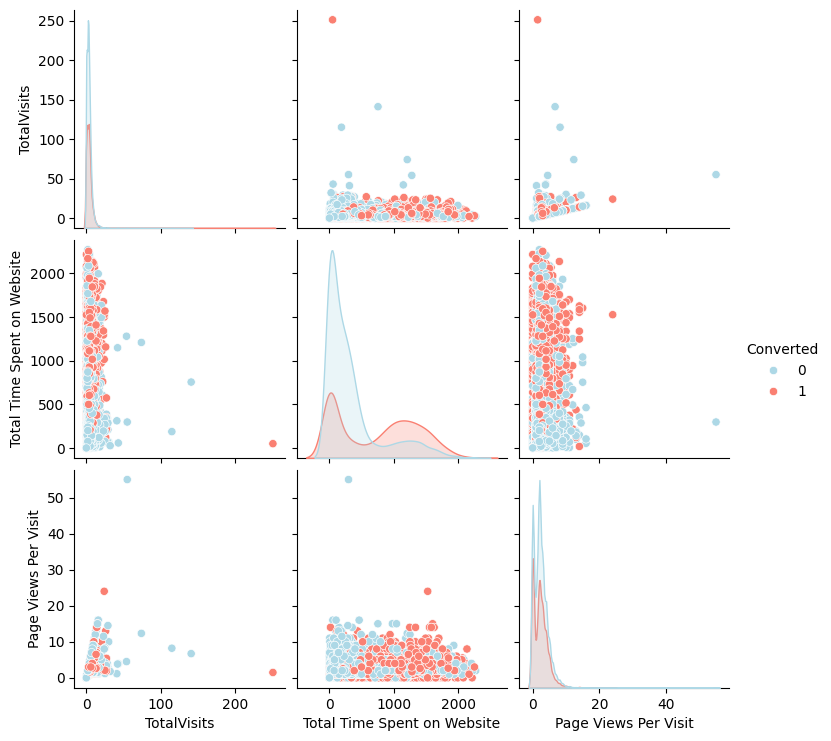

In [72]:
sns.pairplot(lead_score,vars=numeric_cols,hue="Converted",palette={0: 'lightblue', 1: 'salmon'})
plt.show()

In [73]:
numeric_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

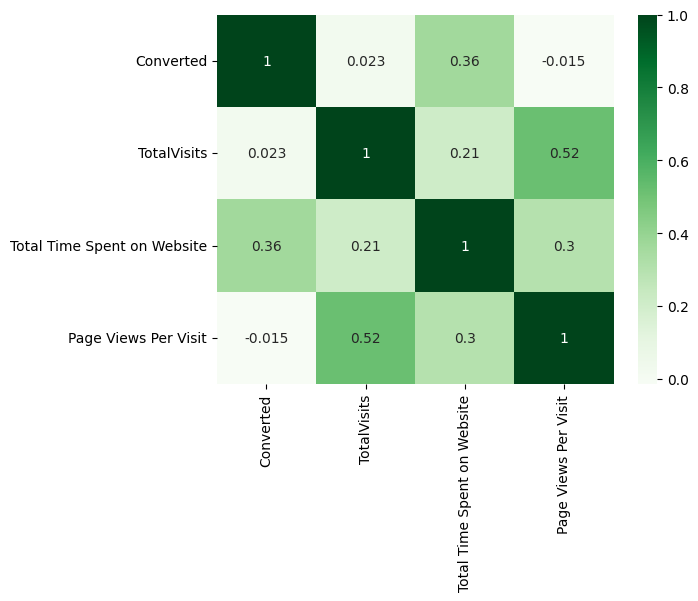

In [74]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=lead_score[['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr(),cmap="Greens",annot=True)
plt.show()


## Step 3: Data Preparation

In [79]:
lead_score

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current_occupation,Free_copy,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,Not Provided,Not Provided,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.50,Email Opened,India,Not Provided,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Others,India,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,India,Not Provided,Unemployed,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Others,Outside India,IT Projects Management,Unemployed,0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,1,SMS Sent
9237,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,1,SMS Sent
9238,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Not Provided,0,SMS Sent


In [80]:
X = pd.get_dummies(lead_score.drop(columns=['Converted']))
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_India,Country_Not Provided,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Businessman,Current_occupation_Housewife,Current_occupation_Not Provided,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,2.0,1532,2.0,1,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,0,2.0,1428,1.0,

In [81]:
y = lead_score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

#### Model 1

In [88]:
# 70-30 data split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
scaler = MinMaxScaler()
X_train_scaled_1 =scaler.fit_transform(X_train_1)

In [90]:
scaler = MinMaxScaler()
X_test_scaled_1 =scaler.fit_transform(X_test_1)

## Step 5: Building a logistic model


#### Model 1

In [91]:
model1 = LogisticRegression()
model1.fit(X_train_scaled_1, y_train_1)

LogisticRegression()

## Step 6: Residual Analysis of the train data

## Step 7: Making Predictions Using the Final Model

#### Model 1

In [93]:
y_pred_1 = model1.predict(X_test_1)

## Step 8: Model Evaluation

#### Model 1

In [96]:
# Step 6: Score Evaluation
accuracy_m1 = accuracy_score(y_test_1, y_pred_1)
conf_matrix_m1 = confusion_matrix(y_test_1, y_pred_1)
class_report_m1 = classification_report(y_test_1, y_pred_1)

In [98]:
print(f'Accuracy: {accuracy_m1:.2f}')

Accuracy: 0.49


In [99]:
print('Confusion Matrix:')
print(conf_matrix_m1)

Confusion Matrix:
[[ 336 1359]
 [  62 1015]]


In [102]:
print('Classification Report:')
print(class_report_m1)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.20      0.32      1695
           1       0.43      0.94      0.59      1077

    accuracy                           0.49      2772
   macro avg       0.64      0.57      0.45      2772
weighted avg       0.68      0.49      0.42      2772

